__Обучите нейронную сеть на Keras для Fashion-MNIST датасете. Опишите параметры сети и результаты обучения. Что помогло вам улучшить ее точность?__

In [1]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from keras.datasets import fashion_mnist

In [2]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [3]:
print(f"Размерность train_images: {train_images.shape}")
print(f"Размерность test_images: {test_images.shape}")

flt_size = train_images.shape[1] * train_images.shape[2]

print(f"Значения train_labels: {np.unique(train_labels)}")
print(f"Значения test_labels: {np.unique(test_labels)}")

Размерность train_images: (60000, 28, 28)
Размерность test_images: (10000, 28, 28)
Значения train_labels: [0 1 2 3 4 5 6 7 8 9]
Значения test_labels: [0 1 2 3 4 5 6 7 8 9]


In [4]:
train_images = (train_images / 255) * 2 - 1
test_images = (test_images / 255) * 2 - 1

train_images = train_images.reshape((-1, flt_size))
test_images = test_images.reshape((-1, flt_size))

In [5]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [6]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [7]:
model.fit(train_images,
          to_categorical(train_labels, 10),
          epochs=10,
          batch_size=128,
          validation_split=0.2)

model.evaluate(test_images,
               to_categorical(test_labels))

Epoch 1/10
375/375 [==============================] - 3s 9ms/step - loss: 0.4916 - accuracy: 0.8196 - val_loss: 0.4387 - val_accuracy: 0.8316
Epoch 2/10
375/375 [==============================] - 3s 8ms/step - loss: 0.3683 - accuracy: 0.8635 - val_loss: 0.3810 - val_accuracy: 0.8617
Epoch 3/10
375/375 [==============================] - 3s 8ms/step - loss: 0.3260 - accuracy: 0.8790 - val_loss: 0.3448 - val_accuracy: 0.8765
Epoch 4/10
375/375 [==============================] - 3s 8ms/step - loss: 0.3033 - accuracy: 0.8874 - val_loss: 0.3313 - val_accuracy: 0.8802
Epoch 5/10
375/375 [==============================] - 3s 8ms/step - loss: 0.2830 - accuracy: 0.8941 - val_loss: 0.3346 - val_accuracy: 0.8791
Epoch 6/10
375/375 [==============================] - 3s 8ms/step - loss: 0.2683 - accuracy: 0.8994 - val_loss: 0.3312 - val_accuracy: 0.8805
Epoch 7/10
375/375 [==============================] - 3s 8ms/step - loss: 0.2478 - accuracy: 0.9056 - val_loss: 0.3206 - val_accuracy: 0.8884
Epoch 

[0.3572298288345337, 0.8823999762535095]

In [8]:
y_pred = np.argmax(model.predict(test_images), axis=1)

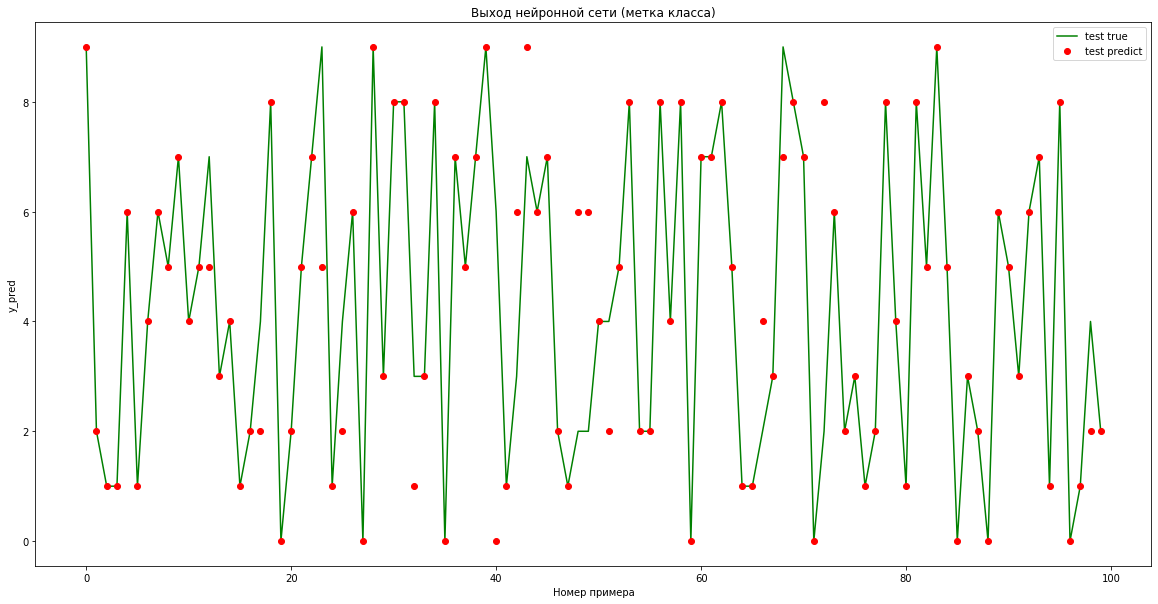

In [9]:
import matplotlib.pyplot as plt

N = 100

plt.figure(figsize=(20,10))
plt.plot(test_labels[:N], 'g', label='test true')
plt.plot(y_pred[:N], 'or', label='test predict')
plt.legend()
plt.title('Выход нейронной сети (метка класса)')
plt.xlabel('Номер примера')
plt.ylabel('y_pred')
plt.show()

У данной полносвязной сети 2 скрытых слоя с 512 и 128 нейронами. Сеть имеет относительно невысокую точность, которую можно повысить более тонкой настройкой модели.

Улучшить точность сети помогает увеличение количества эпох (слишком большое количество приводит к переобучению), количество и сложность слоев, количество нейронов в каждом слое. Для данной модели и датасета изменение оптимизатора и функций активации (на другие возможные для многоклассовой классификации) не приведет к заметному улучшению качества модели.